In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Задание 4.
Credit Card Fraud Detection Данный датасет является примером несбалансированных данных, так как мошеннические операции с картами встречаются реже обычных. Импортируйте библиотеку Pandas, а также используйте для графиков стиль “fivethirtyeight”. Посчитайте с помощью метода value_counts количество наблюдений для каждого значения целевой переменной Class и примените к полученным данным метод plot, чтобы построить столбчатую диаграмму. Затем постройте такую же диаграмму, используя логарифмический масштаб. На следующем графике постройте две гистограммы по значениям признака V1 - одну для мошеннических транзакций (Class равен 1) и другую - для обычных (Class равен 0). Подберите значение аргумента density так, чтобы по вертикали графика было расположено не число наблюдений, а плотность распределения. Число бинов должно равняться 20 для обеих гистограмм, а коэффициент alpha сделайте равным 0.5, чтобы гистограммы были полупрозрачными и не загораживали друг друга. Создайте легенду с двумя значениями: “Class 0” и “Class 1”. Гистограмма обычных транзакций должна быть серого цвета, а мошеннических - красного. Горизонтальной оси дайте название “V1”.

In [2]:
from scipy.stats import mode

ccfd = pd.read_csv('creditcard.csv')
ccfd.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
ccfd.shape


(284807, 31)

In [4]:
ccfd.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
val_c=ccfd['Class'].value_counts()
val_c

0    284315
1       492
Name: Class, dtype: int64

In [6]:
%config InlineBackend.figure_format = 'svg'

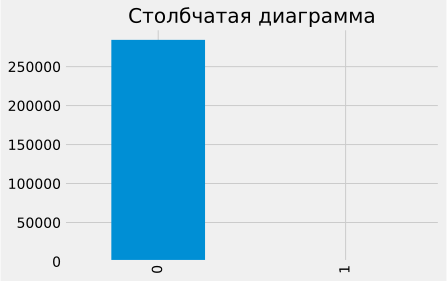

In [7]:
plt.style.use('fivethirtyeight')
val_c.plot(kind = 'bar')
plt.title('Столбчатая диаграмма')
plt.show()

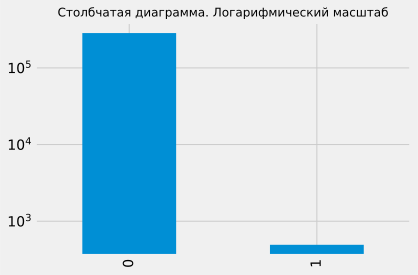

In [8]:
val_c.plot(kind='bar',logy=True)
plt.title('Столбчатая диаграмма. Логарифмический масштаб', fontsize = 12)
plt.show()

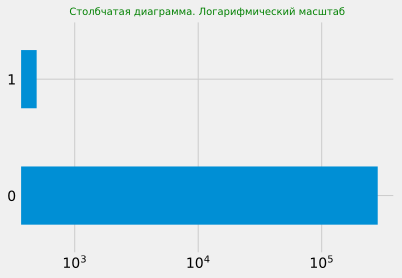

In [9]:
val_c.plot(kind='barh',logx=True)
plt.title('Столбчатая диаграмма. Логарифмический масштаб', fontsize = 10, color = 'green')
plt.show()

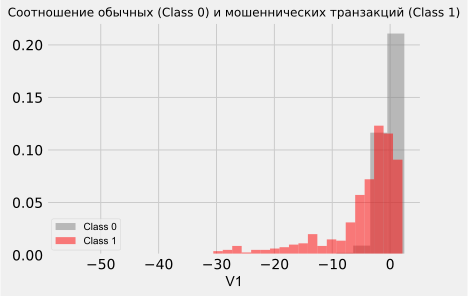

In [11]:
label_dict = {'fontsize': 14,'family': 'arial'}
legend_dict = {'size': 10,'family': 'arial'}
v1_0=ccfd.V1[ccfd.Class==0]
v1_1=ccfd.V1[ccfd.Class==1]
plt.title('Соотношение обычных (Class 0) и мошеннических транзакций (Class 1)', fontsize = 12)
plt.hist(v1_0, bins=20,alpha=0.5,label='Class 0',color='gray',density=True)
plt.hist(v1_1, bins=20,alpha=0.5,label='Class 1',color='red',density=True)
plt.xlabel('V1', fontdict=label_dict)
legend = plt.legend(loc='lower left', prop=legend_dict)
plt.show()
